Jupyter notebook to get a grasp of the data (loosely) related to broadband mapping in the ITU ICT Regulatory Tracker.

For in-depth documentation, please refer to the document describing the functionning of the API and the description of each of the 50 indicators of the ICT Regulatory Tracker (https://app.gen5.digital/ICTRegulatoryTracker.pdf). For more general informatio nabout RME and the data collected, see https://gen5.digital/ .

As a reminder, here are the indicators included in the anaylisis. For every indicator, we keep the value (numeric) and the description (often a string):
```indicator_names = [
        "Separate telecom/ICT regulator",
        "Autonomy in decision making",
        "Accountability",
        "Enforcement power",
        "Sanctions or penalties imposed by regulator",
        "Traditional mandate: entity in charge of quality of service obligations measures and service quality monitoring",
        "Entity in charge of universal service/access",
        "Consumer issues: entity responsible for comparative tariff information, consumer education and handling consumer complaints",
        "Operators required to publish Reference Interconnection Offer (RIO)",
        "Quality of service monitoring required",
        "Infrastructure sharing for mobile operators permitted",
        "Infrastructure sharing mandated",
        "Co-location/site sharing mandated",
        "Unbundled access to the local loop required", #broadband cost reduction directive (EU legislation)
        "National plan that involves broadband",
        "Level of competition in IMT (3G, 4G, etc.) services",
        "Level of competition in cable modem, DSL, fixed wireless broadband"]``` 

and the 11 African countries studied:
```countries_list = ["Côte d'Ivoire", "Benin", "Nigeria","Ethiopia","Kenya","Uganda","Burundi","Zambia","Malawi","Zimbabwe","Botswana"]```

# Ideas
- Map with colour gradient of countries for maturity ?


In [2]:
import pandas as pd

In [6]:
from get_ICT_regulatory_tracker import create_ICTRT_datasets
from get_G5_benchmark import create_G5_datasets


create_ICTRT_datasets()
create_G5_datasets()

africa_bb_maps = pd.read_csv("data/ICT_regulatory_tracker_2022.csv")
europe_countries = pd.read_csv("data/ICT_regulatory_tracker_Europe_2022.csv")

Africa numeric summary:
Max scores - Regulatory authority: 20 - Regulatory mandates: 22 - Regulatory regime: 30 - Competition framework: 28 - overall score: 100
         year  regulatoryAuthorityScore  regulatoryMandateScore  \
count    11.0                 11.000000               11.000000   
mean   2024.0                 17.000000               19.590909   
std       0.0                  2.569047                2.396019   
min    2024.0                 12.000000               15.000000   
25%    2024.0                 16.000000               18.500000   
50%    2024.0                 18.000000               20.000000   
75%    2024.0                 19.000000               21.500000   
max    2024.0                 20.000000               22.000000   

       regulatoryRegimeScore  competitionFrameworkScore  overallScore  \
count              11.000000                  11.000000     11.000000   
mean               19.636364                  20.575758     76.803030   
std             

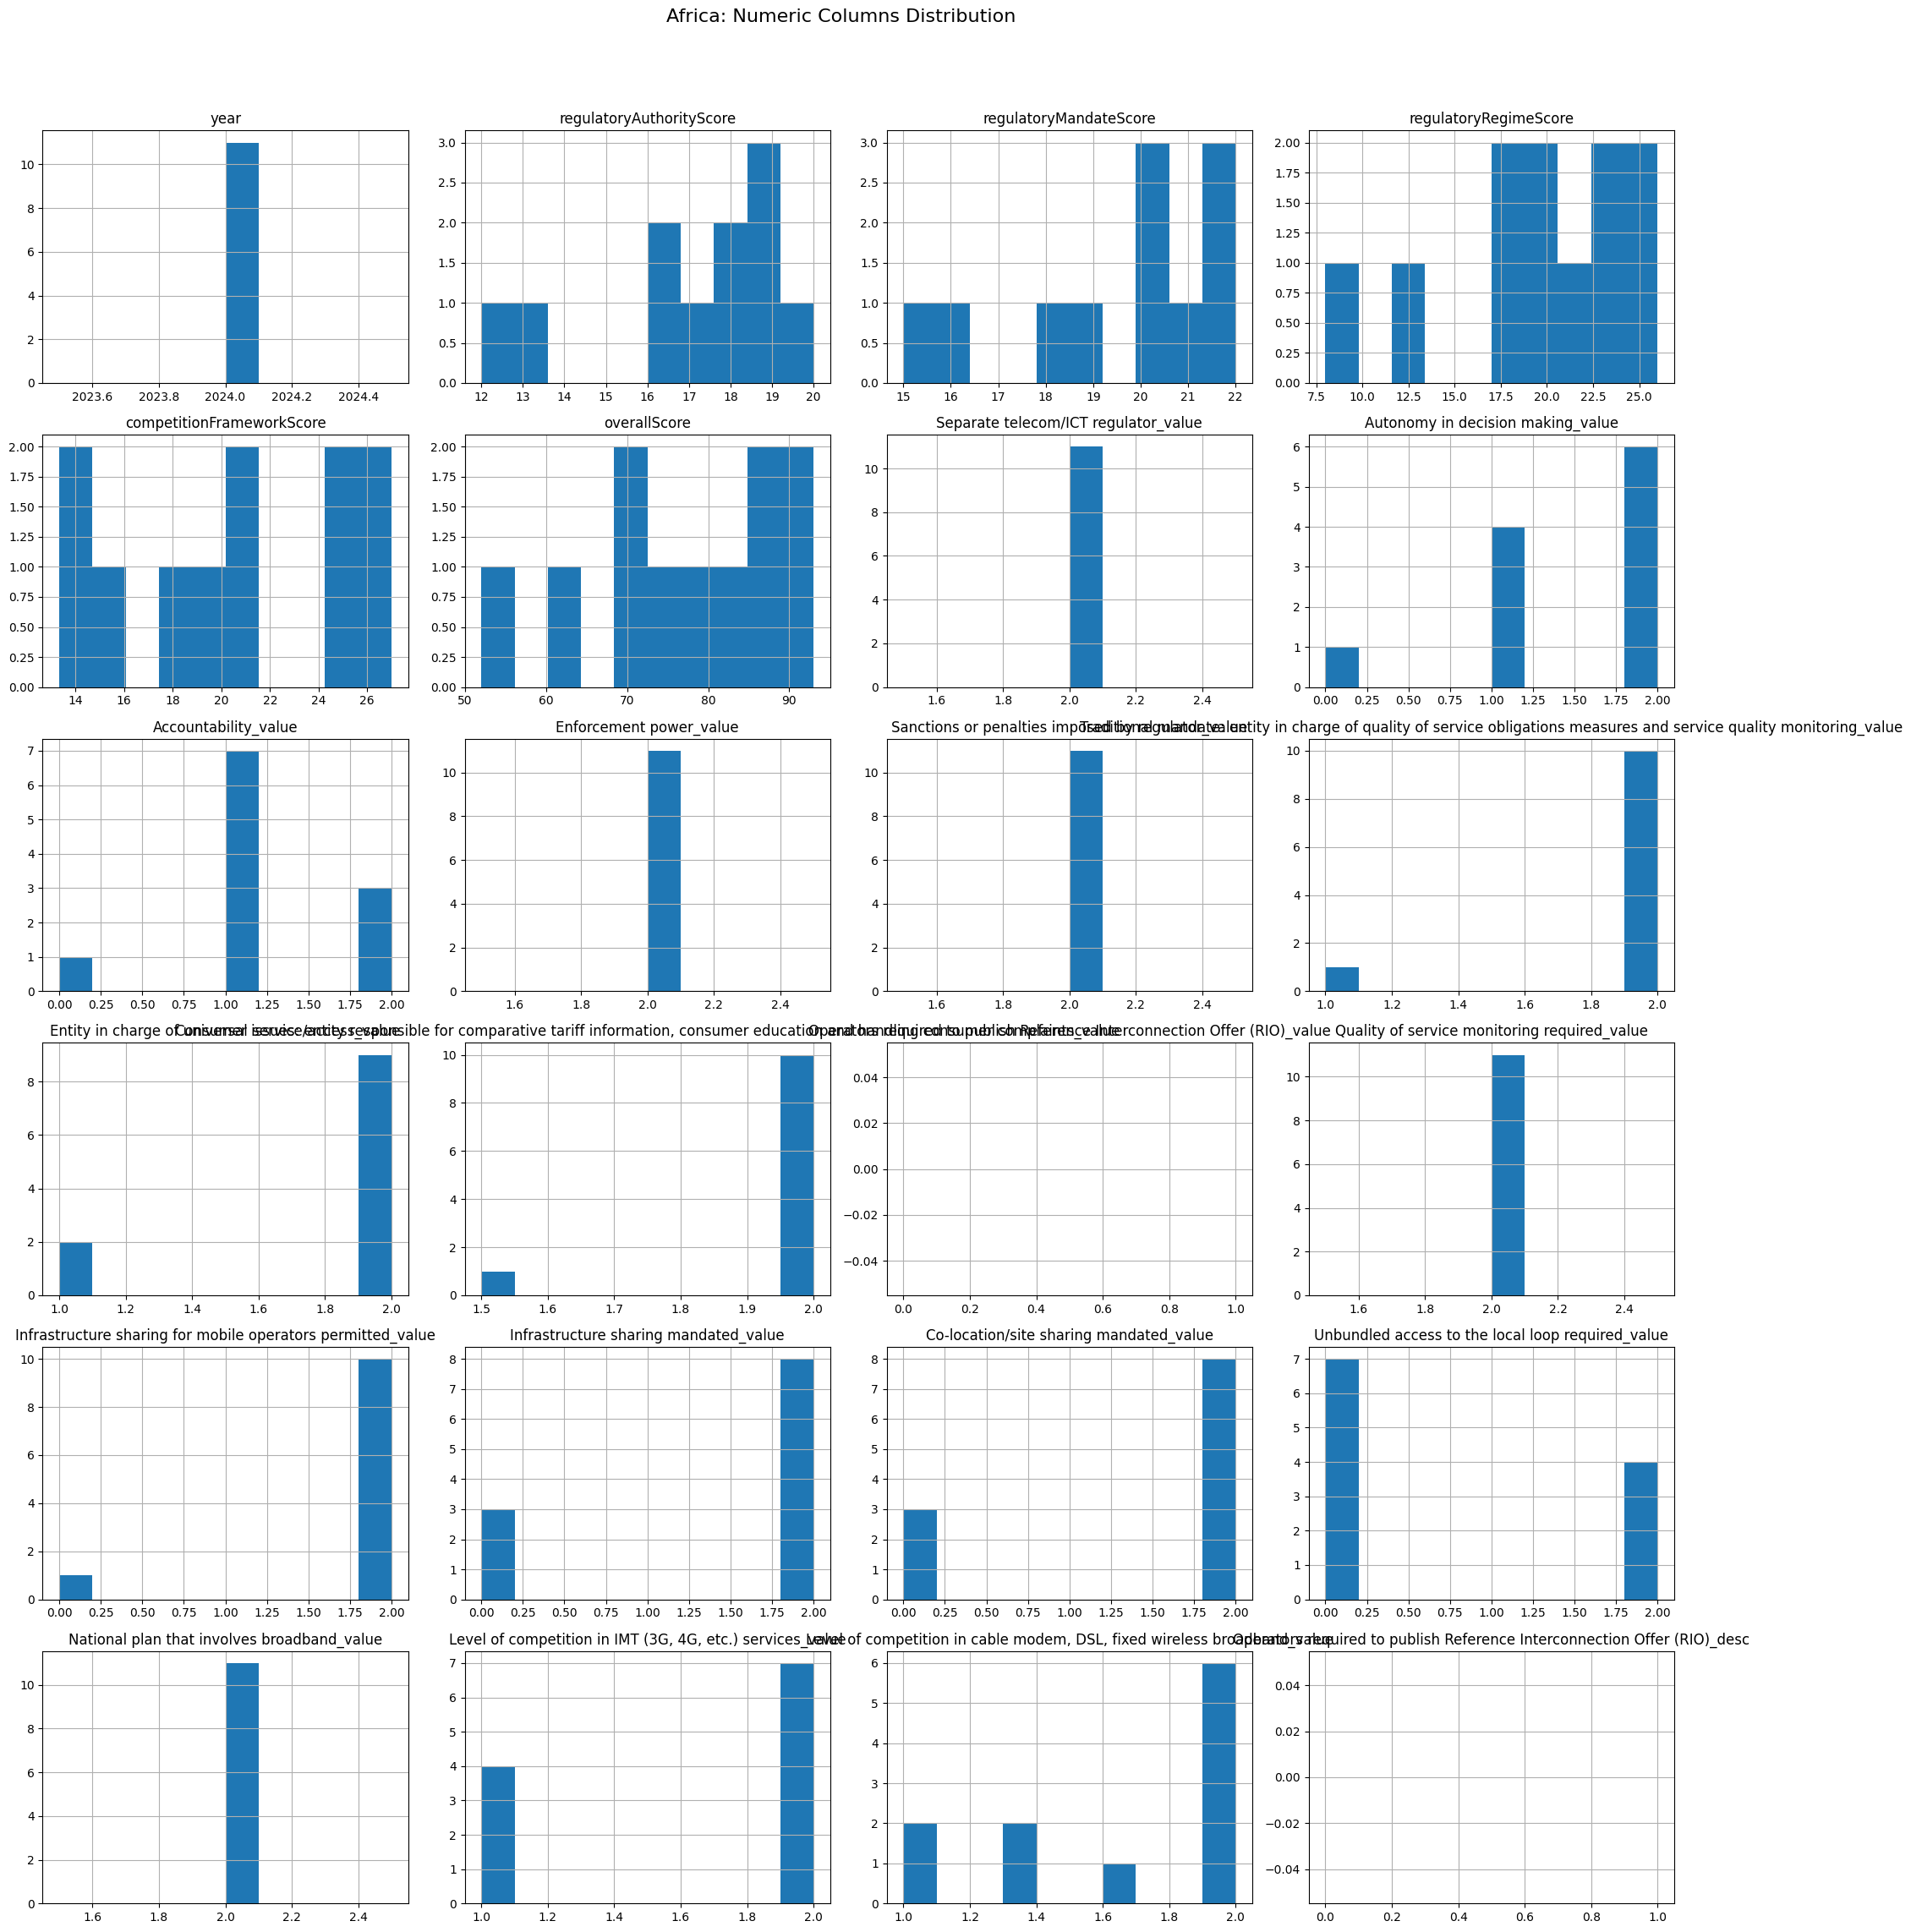

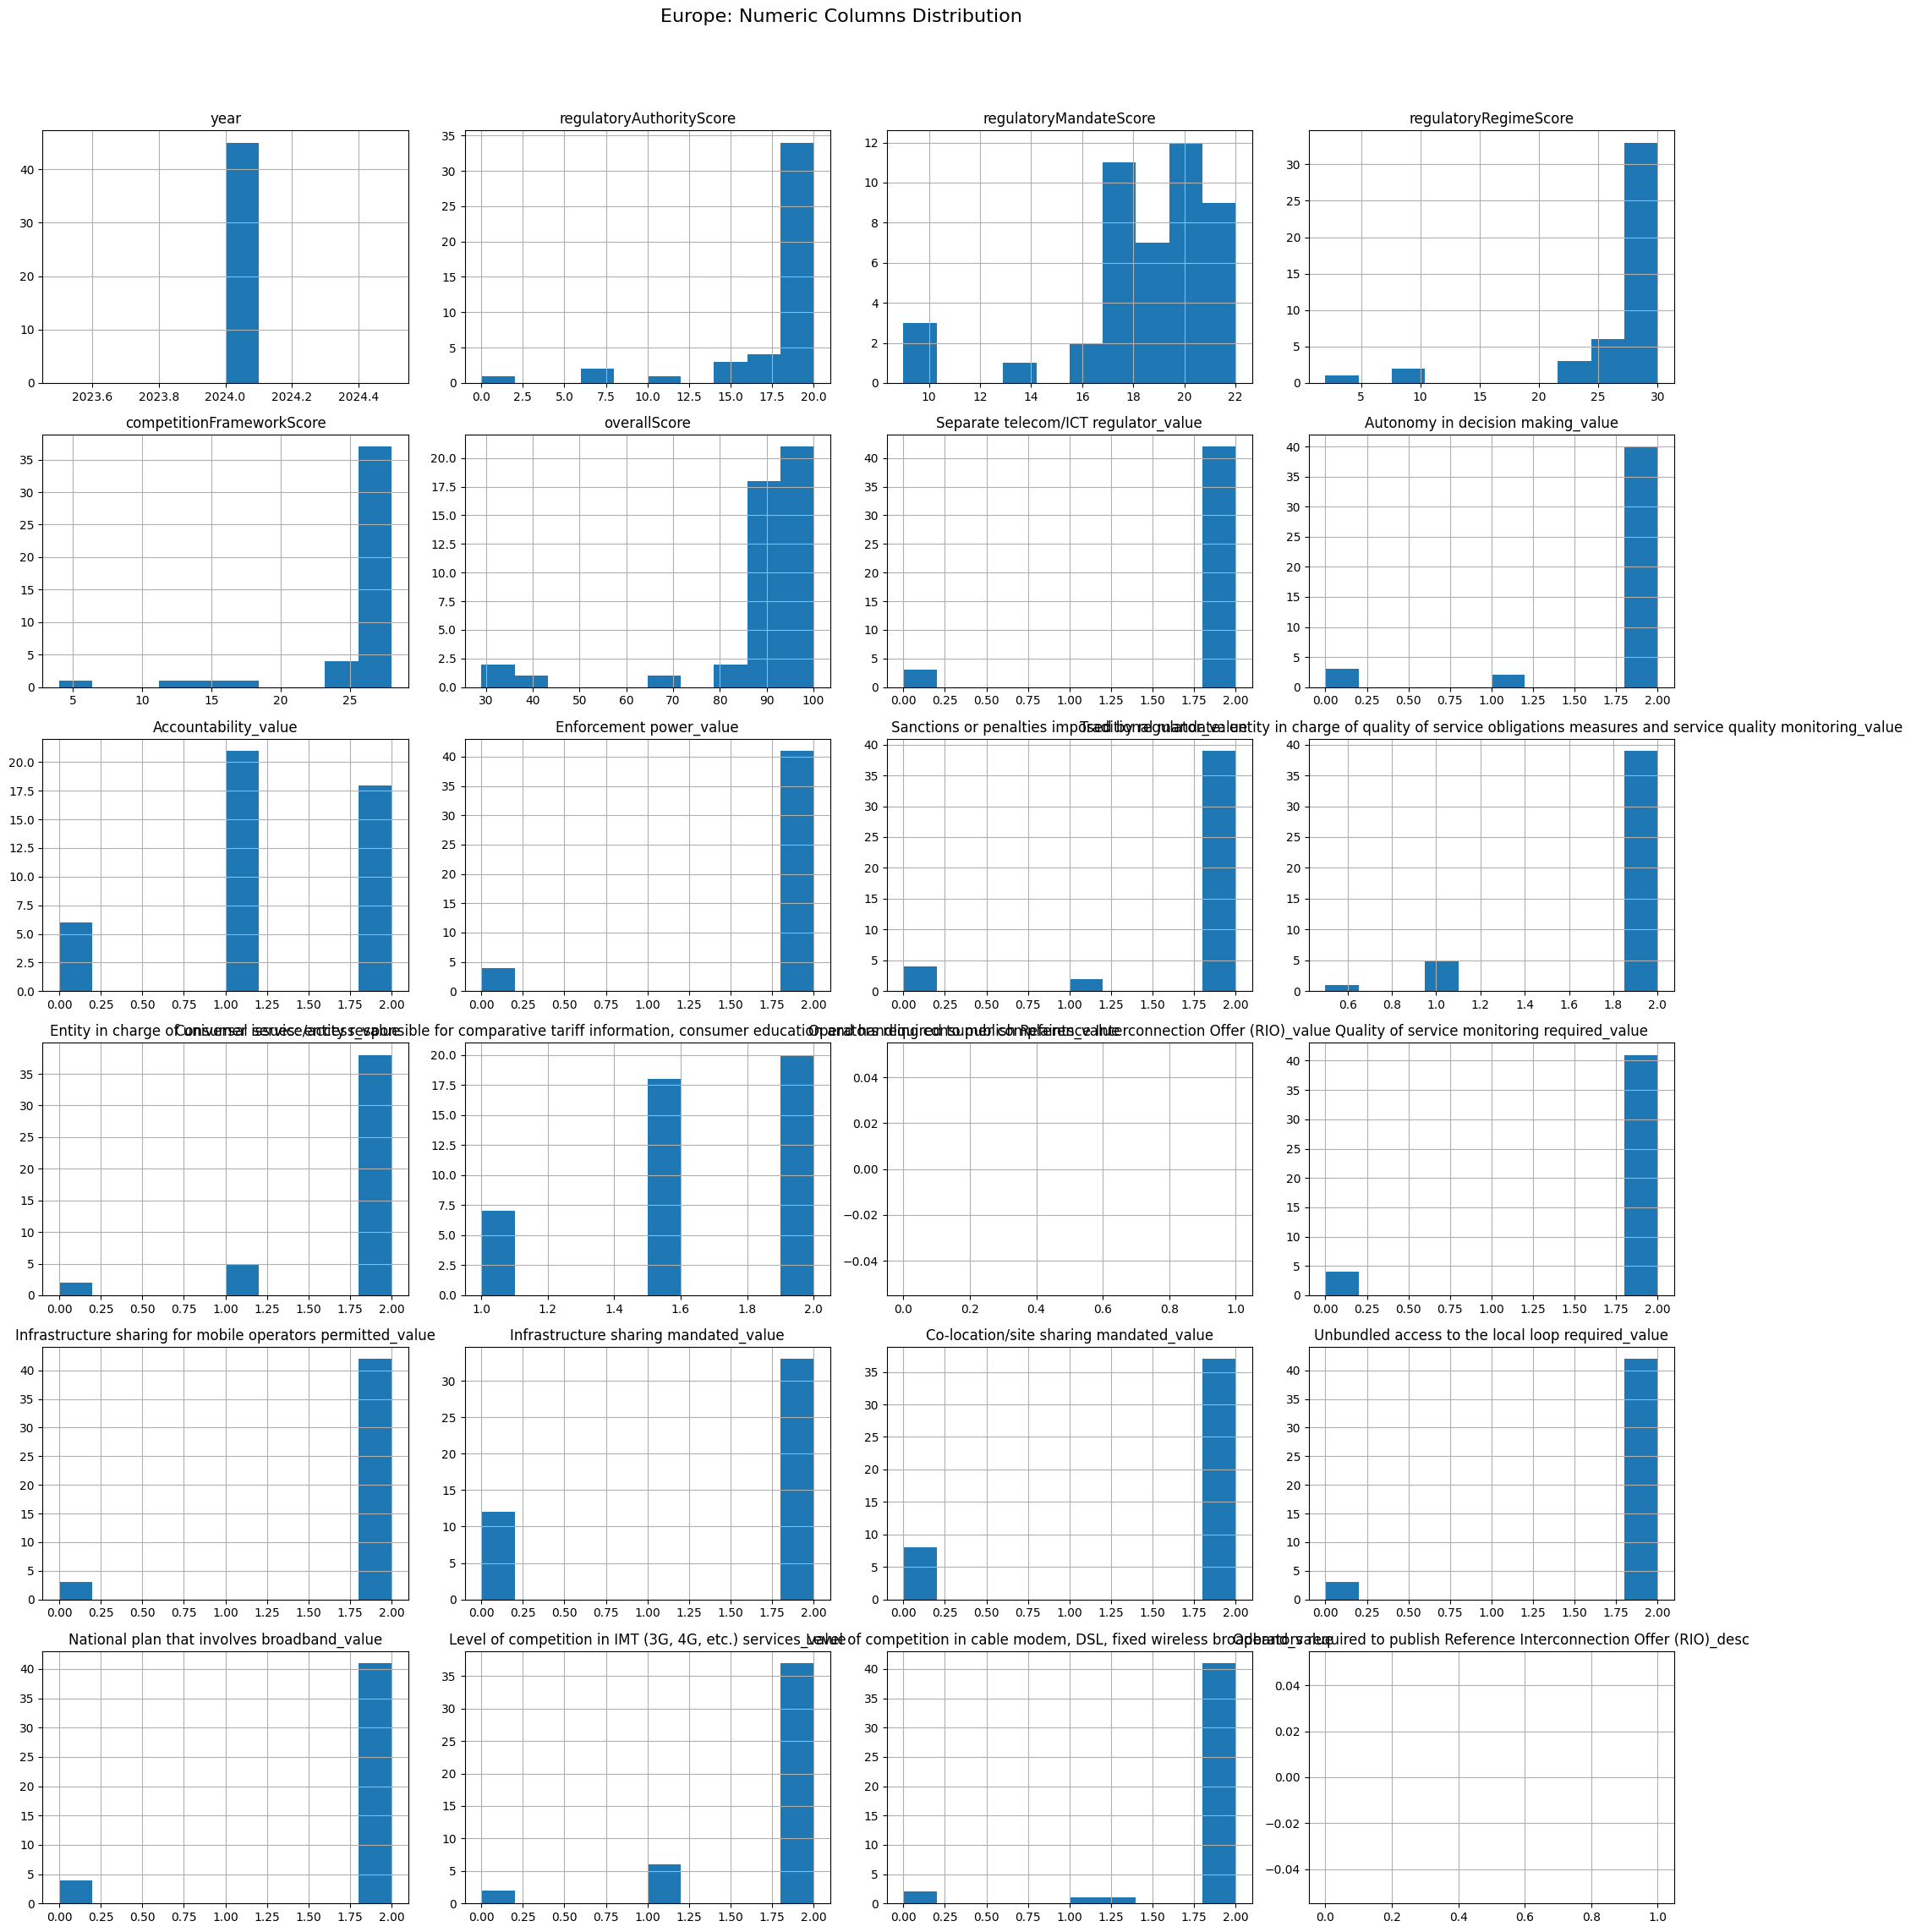

In [ ]:
# Summary statistics for numeric columns
print('Africa numeric summary:')
print("Max scores - Regulatory authority: 20 - Regulatory mandates: 22 - Regulatory regime: 30 - Competition framework: 28 - overall score: 100")
print(africa_bb_maps.describe())
print('\nEurope numeric summary:')
print("Max scores - Regulatory authority: 20 - Regulatory mandates: 22 - Regulatory regime: 30 - Competition framework: 28 - overall score: 100")
print(europe_countries.describe())

# Histograms for numeric columns
import matplotlib.pyplot as plt

# Africa
num_cols_africa = africa_bb_maps.select_dtypes(include='number').columns
n_cols = 4
n_rows = (len(num_cols_africa) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(num_cols_africa):
    r, c = divmod(i, n_cols)
    africa_bb_maps[col].hist(ax=axes[r, c], bins=10)
    axes[r, c].set_title(col, fontsize=12)
for j in range(i+1, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r, c].axis('off')
fig.suptitle('Africa: Numeric Columns Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Europe
num_cols_europe = europe_countries.select_dtypes(include='number').columns
n_cols = 4
n_rows = (len(num_cols_europe) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(num_cols_europe):
    r, c = divmod(i, n_cols)
    europe_countries[col].hist(ax=axes[r, c], bins=10)
    axes[r, c].set_title(col, fontsize=12)
for j in range(i+1, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    axes[r, c].axis('off')
fig.suptitle('Europe: Numeric Columns Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Max scores per pillar: 
- Regulatory authority: 20
- Regulatory mandates: 22
- Regulatory regime: 30
- Competition framework: 28
Mean is similar for the two regions in the first two indicators. Europe higher on the last two indicators (26&25 vs. 19&20)

Out of the 11 African countries, only 4 have an equivalent of the European Broadband Cost Reduction Directive being implemented.

All 11 countries have a national plan that involves broadband.

"Operators required to publish Reference Interconnection Offer (RIO)" seems to be a NaN for most african countries (not the case for Europe).

In [7]:
# Value counts for categorical columns (first 5 columns as example)
cat_cols_africa = africa_bb_maps.select_dtypes(include=['object']).columns[:5]
for col in cat_cols_africa:
    print(f'Africa - Value counts for {col}:')
    print(africa_bb_maps[col].value_counts(dropna=False))
    print('\n')

cat_cols_europe = europe_countries.select_dtypes(include=['object']).columns[:5]
for col in cat_cols_europe:
    print(f'Europe - Value counts for {col}:')
    print(europe_countries[col].value_counts(dropna=False))
    print('\n')

Africa - Value counts for region:
region
Africa    11
Name: count, dtype: int64


Africa - Value counts for country:
country
Benin            1
Botswana         1
Burundi          1
Côte d'Ivoire    1
Ethiopia         1
Kenya            1
Malawi           1
Nigeria          1
Uganda           1
Zambia           1
Zimbabwe         1
Name: count, dtype: int64


Africa - Value counts for generation:
generation
G3    5
G4    4
G2    2
Name: count, dtype: int64


Africa - Value counts for Separate telecom/ICT regulator_desc:
Separate telecom/ICT regulator_desc
Yes    11
Name: count, dtype: int64


Africa - Value counts for Autonomy in decision making_desc:
Autonomy in decision making_desc
Yes, for all decisions     6
Yes, for some decisions    4
No                         1
Name: count, dtype: int64


Europe - Value counts for region:
region
Europe    45
Name: count, dtype: int64


Europe - Value counts for country:
country
Albania                   1
Andorra                   1
Austria    

In [21]:
# Shape of the datasets
print('Africa dataset shape:', africa_bb_maps.shape)
print('Europe dataset shape:', europe_countries.shape)

# Missing values
print('Missing values in Africa dataset:')
print(africa_bb_maps.isnull().sum())
print('\nMissing values in Europe dataset:')
print(europe_countries.isnull().sum())

Africa dataset shape: (11, 43)
Europe dataset shape: (45, 43)
Missing values in Africa dataset:
year                                                                                                                                  0
region                                                                                                                                0
country                                                                                                                               0
regulatoryAuthorityScore                                                                                                              0
regulatoryMandateScore                                                                                                                0
regulatoryRegimeScore                                                                                                                 0
competitionFrameworkScore                                                               

"Operators required to publish Reference Interconnection Offer (RIO)" has no value, neither in Africa dataset nor in Europe Dataset.